Imports

In [2]:
from IPython.display import Markdown as md, display
import pandas as pd
from matplotlib import MatplotlibDeprecationWarning
from statsmodels.tools.sm_exceptions import ConvergenceWarning, HessianInversionWarning
import data_processing as dproc
import plot as plot
import warnings

# ignore these warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=HessianInversionWarning)
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

# Cleaning and analysing raw data

Southern Ring Road of Ljubljana  Var:  3374499.8176657874  Mean:  3057.687174541948


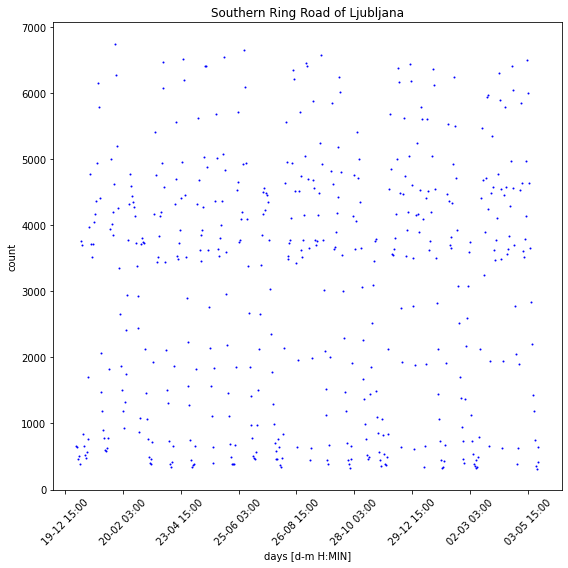

In [3]:
df = pd.read_csv(r'..\data\df_2019.csv')
df = dproc.clean_data(df)
plot.plot_raw_data([df], ["Southern Ring Road of Ljubljana"], [1500])

# Building models

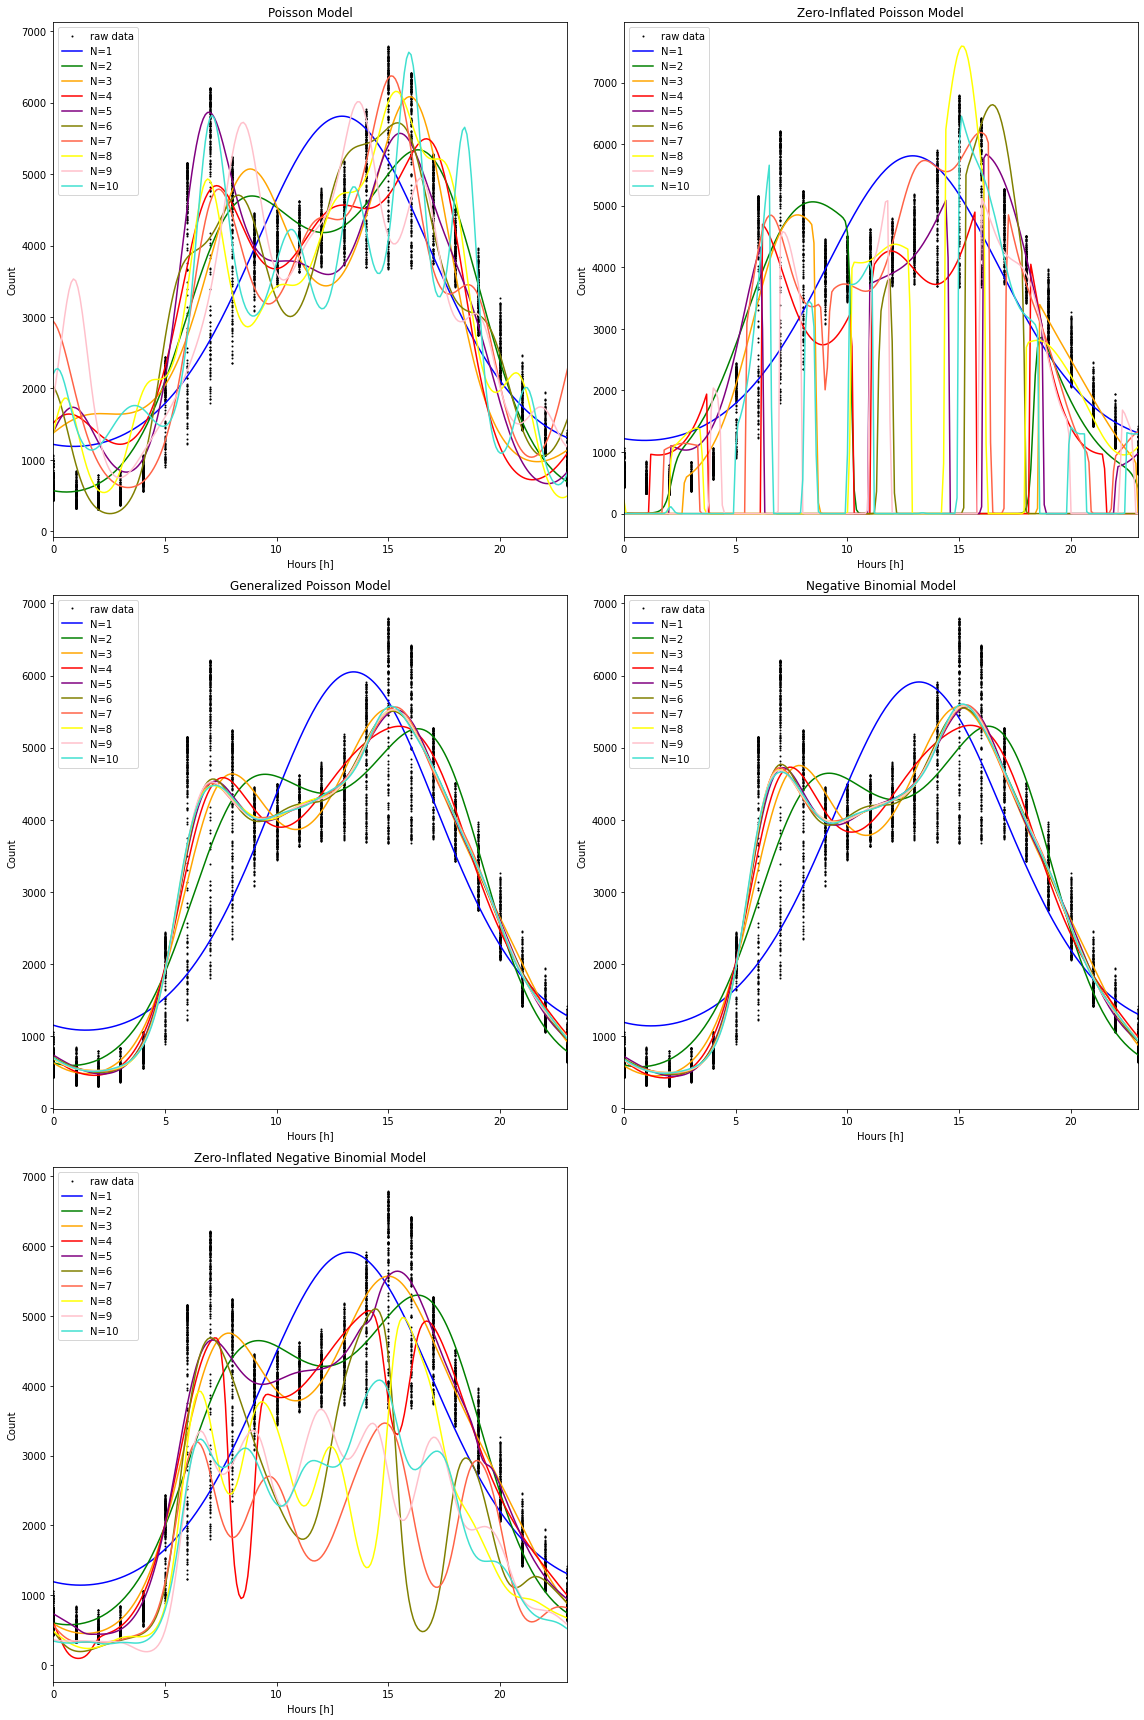

,model_type,n_components,amplitude,mesor,peaks,heights,p,RSS,AIC,BIC,log_likelihood,logs,mean(est),Y(est)
0,poisson,1,2310.54,3499.23,[12.91],[5809.77],1.110223e-16,6.362619e+09,2.203995e+06,2.204014e+06,-1.101994e+06,"[-144.59713541494375, -173.53495101465296, -39...",3057.620620,"[1188.8347200697049, 1226.1294089421456, 1332...."
1,poisson,2,2394.40,2944.97,"[8.91, 16.32]","[4693.3, 5339.37]",1.110223e-16,2.812110e+09,9.105555e+05,9.105882e+05,-4.552727e+05,"[-12.627608722124478, -4.544606543997361, -145...",3057.730368,"[559.8745958094647, 663.7387179096863, 914.808..."
2,poisson,3,2553.28,3528.61,"[8.81, 15.92]","[5071.47, 6081.89]",1.110223e-16,5.190179e+09,2.272227e+06,2.272272e+06,-1.136106e+06,"[-348.1487725253346, -405.35268594016316, -604...",3056.904524,"[1580.213255109423, 1647.1666573262619, 1640.6..."
3,poisson,4,2385.74,3108.04,"[7.31, 13.01, 16.72]","[4837.53, 4566.0, 5493.78]",1.110223e-16,3.874357e+09,1.958392e+06,1.958451e+06,-9.791869e+05,"[-372.2626177166003, -247.94651429017858, -318...",3055.653337,"[1621.246538080126, 1373.1143791723846, 1218.5..."
4,poisson,5,2598.22,3265.88,"[7.01, 15.52]","[5864.1, 5570.54]",1.110223e-16,3.321464e+09,1.495688e+06,1.495760e+06,-7.478329e+05,"[-437.1734966692384, -187.0778220263196, -114....",3059.662989,"[1728.3966796072427, 1254.1624815321545, 850.2..."
5,poisson,6,2734.34,2982.73,"[8.31, 15.42]","[4704.69, 5717.07]",1.110223e-16,3.267573e+09,1.249147e+06,1.249232e+06,-6.245606e+05,"[-53.80393256793286, -141.0284889246318, -43.0...",3056.654954,"[950.0830891269605, 307.9352825356589, 292.319..."
6,poisson,7,2880.35,3493.82,"[7.41, 15.12]","[4789.94, 6374.17]",1.110223e-16,4.932691e+09,2.124078e+06,2.124176e+06,-1.062024e+06,"[-554.630170220672, -66.53981133647312, -31.70...",3060.065124,"[1912.7391542641271, 966.8474566179855, 634.01..."
7,poisson,8,2842.97,3313.83,"[6.91, 15.32, 17.22]","[4931.03, 6156.8, 5211.45]",1.110223e-16,3.640825e+09,1.505147e+06,1.505258e+06,-7.525565e+05,"[-314.5310284812431, -7.201294524106288, -113....",3059.369994,"[1521.6869377520825, 580.4789726589372, 849.28..."
8,poisson,9,2630.43,3381.12,"[8.51, 13.61, 16.42]","[5723.12, 6011.55, 4942.92]",1.110223e-16,7.312447e+09,2.709145e+06,2.709269e+06,-1.354553e+06,"[-1749.5451583849672, -270.79904169063275, -71...",3113.894933,"[3507.939122113199, 1415.4162953069479, 750.60..."
9,poisson,10,3026.52,3678.16,"[7.11, 15.92, 18.42]","[5819.24, 6704.67, 5654.44]",1.110223e-16,6.044707e+09,2.471741e+06,2.471879e+06,-1.235849e+06,"[-288.8934516628183, -151.9134377875357, -589....",3010.262505,"[1475.8734489462518, 1179.8398694540285, 1619...."


In [4]:
models_type = ['poisson', 'zero_poisson', 'gen_poisson', 'nb', 'zero_nb']
n_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# fit to models
df_results = dproc.fit_to_models(df, models_type, n_components)
display(df_results)

# Comparing fitted models
## First compare by model type

In [5]:
best_model_type = dproc.get_best_model_type(df_results, 'Vuong')
print("Best model: {}".format(best_model_type.model_type))
best_model = dproc.get_best_n_components(df_results, 'Vuong', model_type=best_model_type['model_type'])
print("Number of components: {}".format(best_model.n_components))

Best model: gen_poisson
Number of components: 9


## First compare by number of components

In [6]:
best_n_components = dproc.get_best_n_components(df_results, 'Vuong')
print("Number of components: {}".format(best_n_components.n_components))
best_model = dproc.get_best_model_type(df_results, 'Vuong', n_components=best_n_components['n_components'])
print("Best model: {}".format(best_model.model_type))

Number of components: 7
Best model: gen_poisson


We will use the result from the second comparison as the best model.

In [7]:
model_type = best_model.model_type
n_component = int(best_model.n_components)
print("Best model: {}  Number of components: {}".format(best_model.model_type,best_model.n_components))

Best model: gen_poisson  Number of components: 7


# Best model, its parameters and CIs

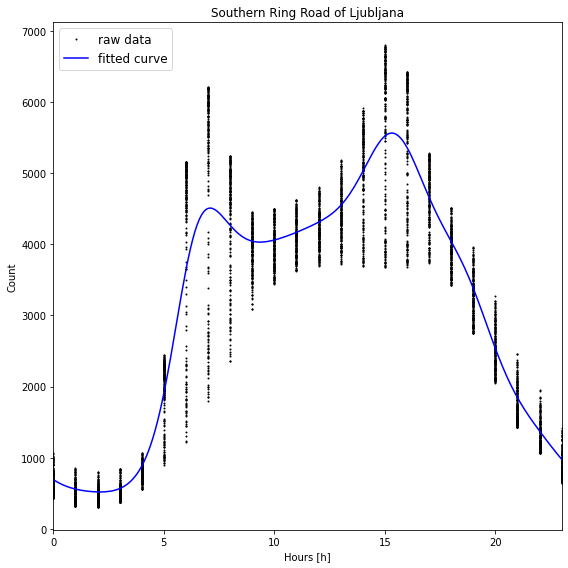

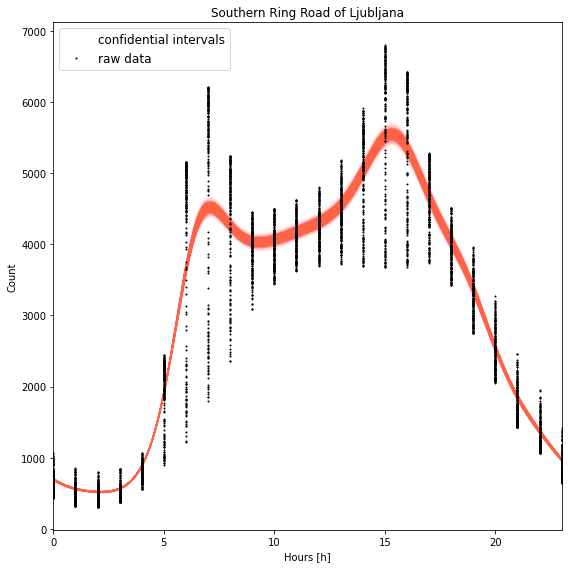

Confidential intervals of model parameters:


,0,1
0,7.771440,7.777464
1,-0.308030,-0.295614
2,-0.986689,-0.976112
3,-0.234054,-0.225708
4,-0.379180,-0.362136
5,-0.187280,-0.172049
6,0.078425,0.086907
7,0.005477,0.016107
8,0.073970,0.085239
9,0.052456,0.065029


Rhythm parameters and its confidential intervals:


,0
model_type,gen_poisson
n_components,7
amplitude,2522.63
mesor,3041.3
peaks,"[7.11, 15.32]"
heights,"[4509.59, 5563.93]"
amplitude_CIs,"[2483.25, 2559.35]"
mesor_CIs,"[3003.74, 3070.45]"
peaks_CIs,"[[6.99, 7.22], [15.19, 15.43]]"
heights_CIs,"[[4400.11, 4598.47], [5487.91, 5628.88]]"


In [8]:
plot.plot_models([df], [model_type], [n_component], title=['Southern Ring Road of Ljubljana'])

CIs_params=plot.plot_confidential_intervals([df], [model_type], [n_component], title=['Southern Ring Road of Ljubljana'])
print('Confidential intervals of model parameters:')
display(CIs_params)

CIs=dproc.calculate_confidential_intervals_parameters(df, n_component, model_type)
best_model = best_model.append(pd.Series(CIs))
best_model=best_model[['model_type','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs']]
print('Rhythm parameters and its confidential intervals:')
display(best_model.to_frame())

# Compare by one component - effect of COVID-19
## All days

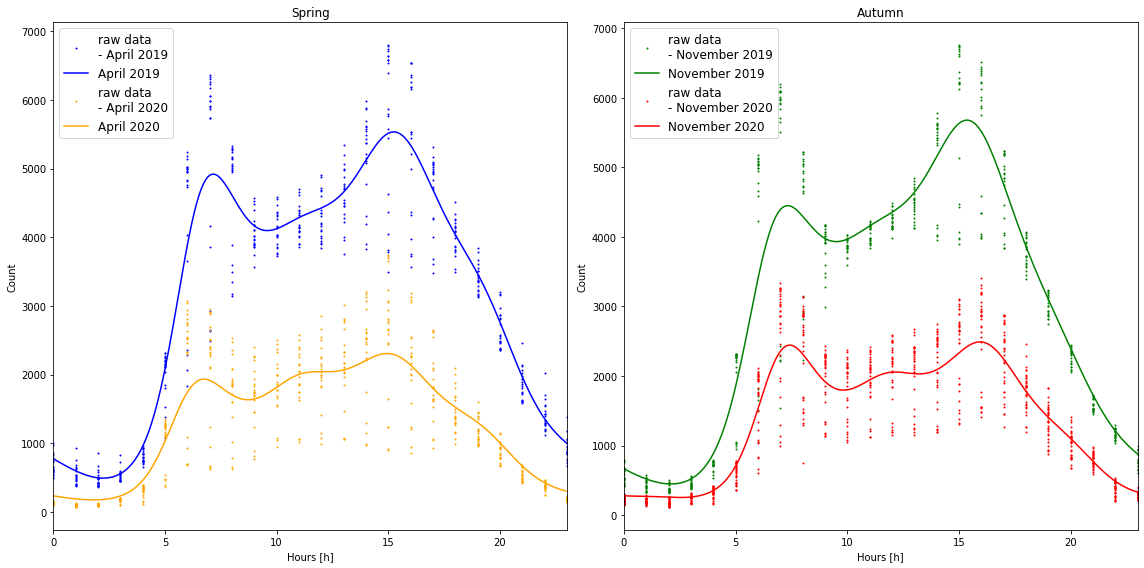

,observation_period,model_type,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs
0,April 2019,gen_poisson,5,2522.20,3013.88,"[7.21, 15.22]","[4919.8, 5536.08]","[2399.93, 2627.81]","[2889.09, 3116.38]","[[6.93, 7.35], [15.11, 15.38]]","[[4550.63, 5198.64], [5290.79, 5742.43]]"
1,November 2019,gen_poisson,5,2616.01,3063.86,"[7.31, 15.32]","[4450.6, 5679.88]","[2475.01, 2798.27]","[2931.12, 3232.45]","[[7.02, 7.47], [15.12, 15.47]]","[[4341.51, 4814.59], [5399.66, 6037.72]]"
2,April 2020,gen_poisson,5,1065.90,1241.10,"[6.71, 11.91, 14.91]","[1933.02, 2042.0, 2307.0]","[920.49, 1250.77]","[1103.84, 1416.08]","[[6.37, 7.18], [14.53, 15.52]]","[[1714.69, 2258.22], [2001.93, 2682.29]]"
3,November 2020,gen_poisson,5,1118.82,1371.95,"[7.41, 12.21, 15.92]","[2445.32, 2057.38, 2490.77]","[1084.47, 1175.54]","[1340.36, 1427.77]","[[7.33, 7.46], [11.7, 12.51], [15.77, 16.18]]","[[2292.24, 2616.31], [2003.69, 2154.6], [2420...."


In [9]:
df_covid = pd.read_csv(r'..\data\df_covid.csv')
df_results = dproc.compare_by_component(df_covid, 'observation_period', n_components, models_type, ax_indices=[0, 1, 0, 1],
                           ax_titles=['Spring', 'Autumn'], rows=1, cols=2,save_file_to='comparison1.pdf')
display(df_results[['observation_period','model_type','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs']])

## Only weekends

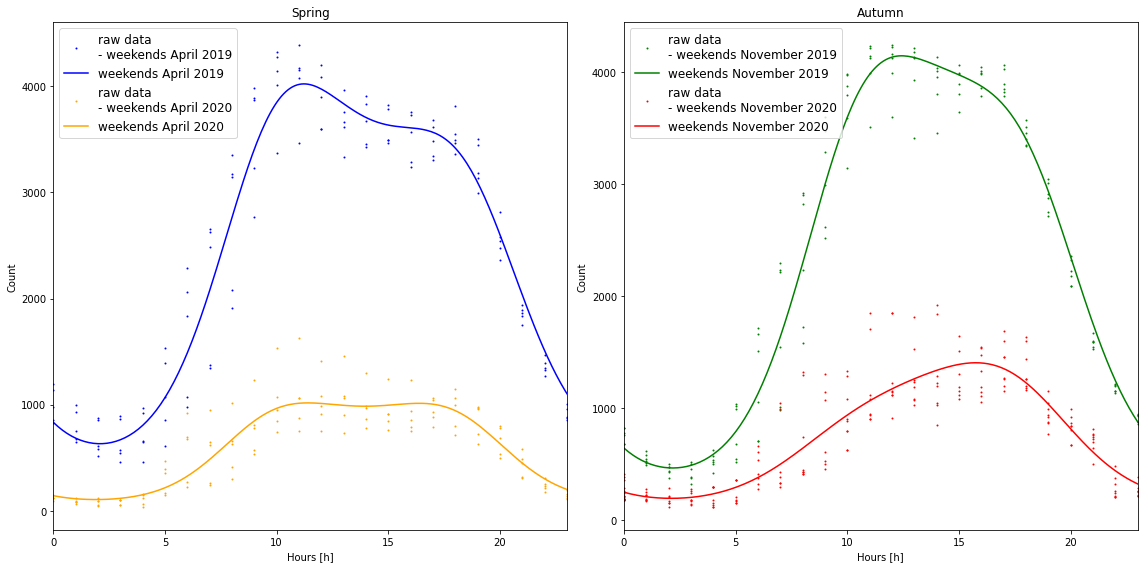

,observation_period,model_type,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs
0,weekends April 2019,gen_poisson,2,1694.28,2326.76,[11.21],[4021.03],"[1621.72, 1769.41]","[2269.63, 2400.85]","[10.89, 11.52]","[3902.01, 4164.86]"
1,weekends November 2019,gen_poisson,2,1838.47,2304.24,[12.41],[4142.72],"[1803.49, 1892.29]","[2269.38, 2354.63]","[12.07, 12.55]","[4082.61, 4208.71]"
2,weekends April 2020,gen_poisson,2,455.14,561.82,"[11.41, 16.42]","[1016.97, 1012.98]","[443.17, 479.05]","[551.06, 589.18]","[10.49, 11.56]","[943.56, 1070.49]"
3,weekends November 2020,gen_poisson,2,604.73,799.73,[15.72],[1404.46],"[585.63, 635.08]","[777.31, 829.96]","[15.42, 16.25]","[1360.31, 1463.95]"


In [10]:
df_covid = pd.read_csv(r'..\data\df_covid_weekends.csv')
df_results = dproc.compare_by_component(df_covid, 'observation_period', n_components, models_type, ax_indices=[0, 1, 0, 1],
                           ax_titles=['Spring', 'Autumn'], rows=1, cols=2,save_file_to='comparison2.pdf')
display(df_results[['observation_period','model_type','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs']])

## Only work days

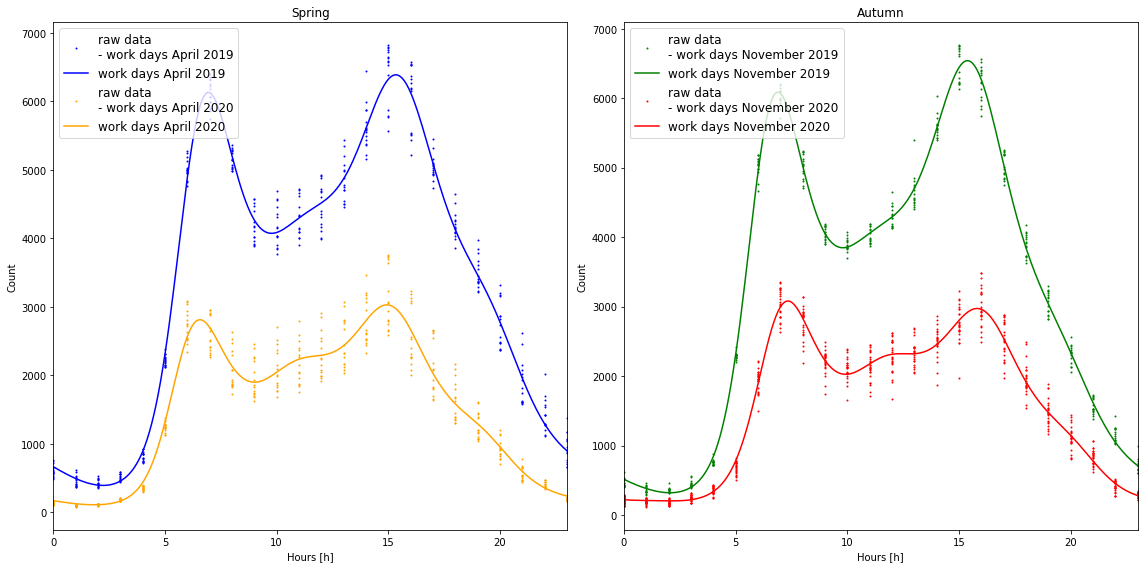

,observation_period,model_type,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs
0,work days April 2019,gen_poisson,5,2997.31,3391.56,"[6.91, 15.32]","[6131.36, 6388.88]","[2941.27, 3061.1]","[3335.51, 3456.21]","[[6.85, 7.02], [15.27, 15.4]]","[[6073.65, 6178.34], [6277.99, 6516.1]]"
1,work days November 2019,gen_poisson,5,3109.44,3430.92,"[6.91, 15.42]","[6088.63, 6540.36]","[3081.86, 3127.81]","[3395.57, 3451.0]","[[6.91, 6.91], [15.32, 15.48]]","[[6018.15, 6139.41], [6478.17, 6578.06]]"
2,work days April 2020,gen_poisson,5,1459.39,1571.00,"[6.61, 14.91]","[2812.68, 3030.39]","[1413.04, 1506.99]","[1525.39, 1617.19]","[[6.49, 6.67], [14.78, 15.09]]","[[2731.54, 2913.08], [2938.66, 3123.95]]"
3,work days November 2020,gen_poisson,5,1438.26,1642.76,"[7.31, 12.41, 15.82]","[3081.01, 2322.26, 2973.43]","[1417.02, 1462.94]","[1620.25, 1669.16]","[[7.26, 7.38], [11.98, 12.51], [15.72, 15.91]]","[[3031.11, 3136.1], [2302.83, 2365.75], [2908...."


In [11]:
df_covid = pd.read_csv(r'..\data\df_covid_workdays.csv')
df_results = dproc.compare_by_component(df_covid, 'observation_period', n_components, models_type, ax_indices=[0, 1, 0, 1],
                           ax_titles=['Spring', 'Autumn'], rows=1, cols=2,save_file_to='comparison3.pdf')
display(df_results[['observation_period','model_type','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs']])